In [2]:
import json
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
from collections import Counter
import nltk
nltk.download('punkt')

with open('../json_files/prepared_sentences.json') as json_file:
    data = json.load(json_file)
    
data

[nltk_data] Downloading package punkt to /Users/Ali/nltk_data...
[nltk_data]   Package punkt is already up-to-date!


{'sentences': [{'description': 'Swearing and obscenity are more repulsive in the speech of a woman than of a man.',
   'comment': 'Swearing and obscenity are as repulsive in the speech of a woman as of a man.',
   'rating': 1},
  {'description': 'Swearing and obscenity are more repulsive in the speech of a woman than of a man.',
   'comment': 'Swearing and obscenity are equally repulsive in the speech of a woman as of a man.',
   'rating': 1},
  {'description': 'Swearing and obscenity are more repulsive in the speech of a woman than of a man.',
   'comment': 'Swearing and obscenity are repulsive in the speech of man and woman.',
   'rating': 2},
  {'description': 'Swearing and obscenity are more repulsive in the speech of a woman than of a man.',
   'comment': 'Swearing and obscenity are more repulsive in the speech of children than of a man.',
   'rating': 1},
  {'description': 'Swearing and obscenity are more repulsive in the speech of a woman than of a man.',
   'comment': 'Swearing

In [3]:
def make_bigrams(str):
    tokens = nltk.word_tokenize(str)
    pos_tag = nltk.pos_tag(tokens)
    pos = [i[1] for i in pos_tag]
    return list(nltk.bigrams(pos))

def get_removed(lst1, lst2):
    return tuple(set(lst1) - set(lst2))

def get_inserted(lst1, lst2):
    return tuple(set(lst2) - set(lst1))

In [4]:
for value in data.values():
    for item in value:
        item['removed_bigrams'] = get_removed(make_bigrams(item['description']), make_bigrams(item['comment']))
        item['inserted_bigrams'] = get_inserted(make_bigrams(item['description']), make_bigrams(item['comment']))


In [5]:
removed_bigrams_list = []
for value in data.values():
    for item in value:
        for bi in item['removed_bigrams']:
            removed_bigrams_list.append(bi)

unique_removed_seq_tag = Counter(removed_bigrams_list).keys()
unique_removed_seq_count = Counter(removed_bigrams_list).values()

removed_bigrams_dict = dict(zip(unique_removed_seq_tag, unique_removed_seq_count))
removed_bigrams_dict = dict(sorted(removed_bigrams_dict.items(), key=lambda kv: kv[1]))
removed_bigrams_dict

{('CC', 'TO'): 1,
 ('TO', 'NN'): 1,
 ('PRP', 'VBZ'): 1,
 ('RB', 'PRP$'): 1,
 ('VBN', 'IN'): 1,
 ('VBN', 'NN'): 1,
 ('IN', 'WDT'): 1,
 ('WDT', 'NNS'): 1,
 ('EX', 'VBP'): 1,
 ('RB', 'RB'): 1,
 ('VB', 'NNS'): 1,
 ('PRP', 'WRB'): 1,
 ('VBP', 'VBN'): 1,
 ('RB', 'VBP'): 1,
 (',', 'NNS'): 1,
 ('VB', '.'): 1,
 ('VB', 'PRP'): 1,
 ('JJR', 'TO'): 1,
 ('PRP$', 'NNS'): 1,
 ('RB', '.'): 1,
 ('DT', 'NNS'): 1,
 ('PDT', 'IN'): 1,
 ('RB', 'PDT'): 1,
 ('NN', 'PRP'): 1,
 ('VB', 'PRP$'): 1,
 ('CC', 'NNS'): 1,
 ('JJ', 'TO'): 2,
 ('VBN', 'RB'): 2,
 ('VB', 'VBN'): 2,
 ('IN', 'RBR'): 2,
 ('JJ', 'NNS'): 2,
 ('VBP', 'JJ'): 2,
 ('RB', 'VBN'): 2,
 ('RB', 'VBG'): 2,
 ('CC', 'RB'): 2,
 ('JJ', 'CC'): 2,
 ('DT', 'JJ'): 2,
 ('TO', 'PRP$'): 2,
 ('POS', 'NN'): 2,
 ('VB', 'NN'): 2,
 ('TO', 'NNS'): 2,
 ('VBN', 'TO'): 2,
 ('VB', 'JJ'): 2,
 ('JJ', 'RB'): 2,
 ('VB', 'IN'): 2,
 ('PRP', '.'): 2,
 ('JJR', 'JJ'): 2,
 ('CC', 'NN'): 2,
 ('POS', 'JJ'): 2,
 ('NNS', 'RB'): 2,
 ('NN', 'VBZ'): 2,
 ('NN', 'NN'): 3,
 ('NN', 'VBG'): 3,
 ('

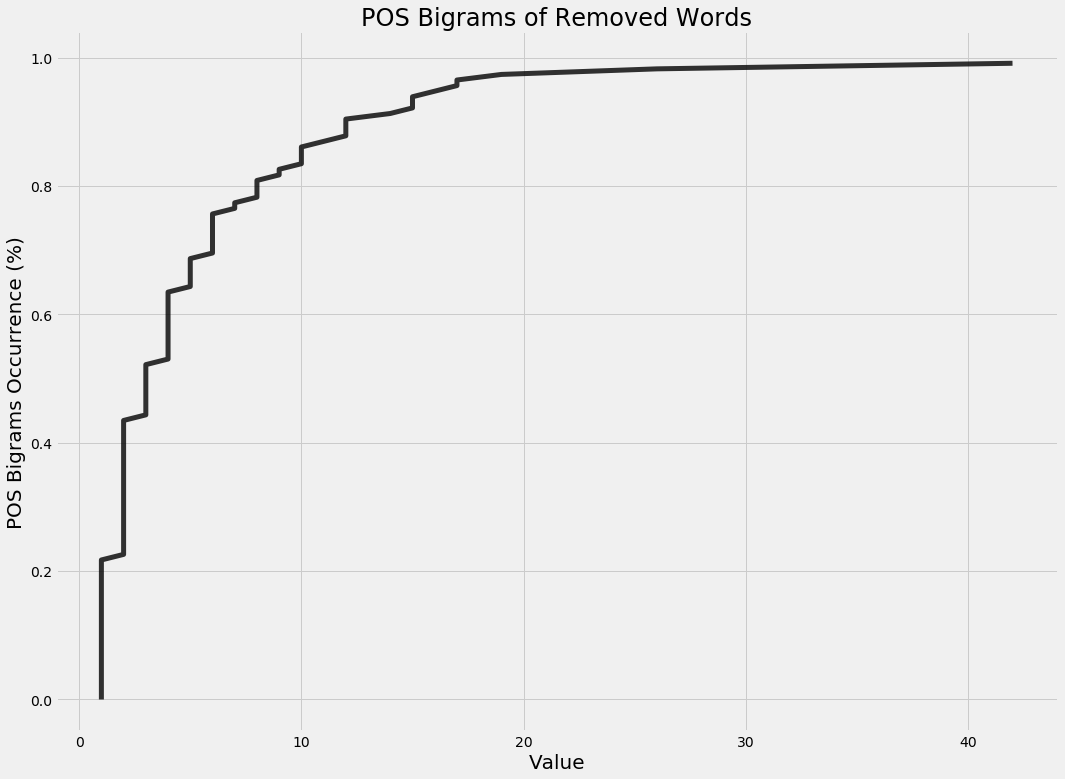

In [15]:

fig, ax = plt.subplots(figsize=(16, 12))

x = np.sort(list(unique_removed_seq_count))
y = np.arange(len(x))/float(len(x))

# Plot both
plt.style.use('fivethirtyeight')
plt.plot(x, y , color='black', lw=5, alpha=0.8)
ax.grid(True)

ax.set_title('POS Bigrams of Removed Words', fontsize=24)
ax.set_xlabel('Value', fontsize=20)
ax.set_ylabel('POS Bigrams Occurrence (%)', fontsize=20)

plt.savefig('../images/removed_bigram.png')
plt.show()

In [7]:
inserted_bigrams_list = []
for value in data.values():
    for item in value:
        for bi in item['inserted_bigrams']:
            inserted_bigrams_list.append(bi)

unique_inserted_seq_tag = Counter(inserted_bigrams_list).keys()
unique_inserted_seq_count = Counter(inserted_bigrams_list).values()

inserted_bigrams_dict = dict(zip(unique_inserted_seq_tag, unique_inserted_seq_count))
inserted_bigrams_dict = dict(sorted(inserted_bigrams_dict.items(), key=lambda kv: kv[1]))
inserted_bigrams_dict


{('VBN', 'DT'): 1,
 ('CC', 'VBP'): 1,
 ('PRP', 'MD'): 1,
 ('VBG', 'PRP$'): 1,
 (',', 'VBG'): 1,
 ('VBG', 'IN'): 1,
 ('VBN', 'RB'): 1,
 ('VBN', 'NNS'): 1,
 ('NNS', 'NNS'): 1,
 ('PRP', 'CC'): 1,
 ('CC', 'PRP'): 1,
 ('CC', 'VBG'): 1,
 ('JJ', ','): 1,
 ('JJ', '.'): 1,
 ('JJ', 'RB'): 1,
 ('DT', 'VBZ'): 1,
 (',', 'DT'): 1,
 ('NNS', 'POS'): 1,
 ('POS', 'TO'): 1,
 ('POS', 'CC'): 1,
 ('VBZ', 'NN'): 1,
 ('RB', 'NN'): 1,
 ('RB', 'PRP'): 1,
 ('POS', 'RB'): 1,
 ('POS', 'JJ'): 1,
 (',', 'NN'): 1,
 ('TO', 'VBG'): 1,
 ('JJS', 'NN'): 1,
 ('DT', 'JJS'): 1,
 ('VB', '.'): 1,
 ('RBR', 'IN'): 1,
 ('NNP', 'RB'): 1,
 ('DT', 'PRP$'): 1,
 ('DT', 'MD'): 1,
 ('NNP', 'MD'): 1,
 ('TO', 'NNS'): 1,
 ('RP', 'IN'): 1,
 ('JJS', 'NNS'): 1,
 ('NN', 'NNS'): 1,
 ('NNP', 'VBZ'): 1,
 ('JJR', 'NN'): 1,
 ('VBP', 'TO'): 1,
 ('VBN', 'VB'): 1,
 ('VBP', '.'): 1,
 ('IN', 'PRP'): 1,
 ('VB', 'VB'): 1,
 ('CC', 'VB'): 1,
 ('CD', 'IN'): 1,
 ('NNS', 'DT'): 1,
 ('JJR', 'JJR'): 1,
 ('JJR', 'IN'): 1,
 ('IN', 'VBG'): 2,
 ('NNP', 'IN'): 2,
 ('

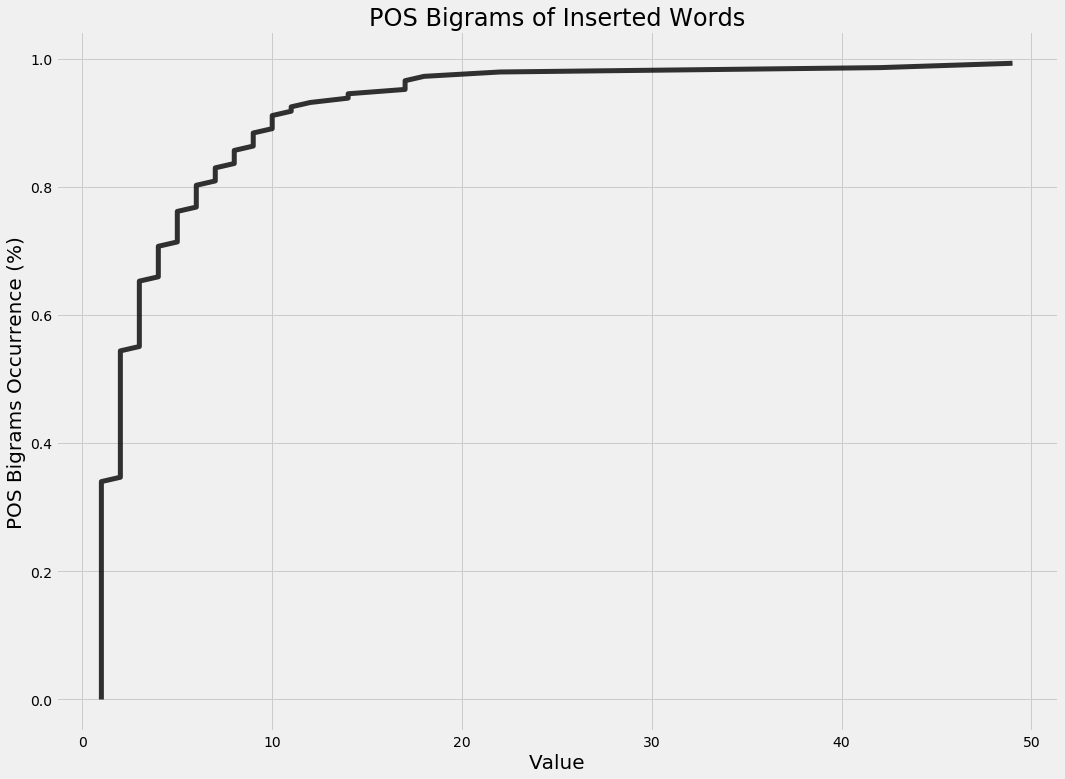

In [8]:
fig, ax = plt.subplots(figsize=(16, 12))

x = np.sort(list(unique_inserted_seq_count))
y = np.arange(len(x))/float(len(x))

# Plot both
plt.style.use('fivethirtyeight')
plt.plot(x, y , color='black', lw=5, alpha=0.8)
ax.grid(True)
ax.set_title('POS Bigrams of Inserted Words', fontsize=24)
ax.set_xlabel('Value', fontsize=20)
ax.set_ylabel('POS Bigrams Occurrence (%)', fontsize=20)
plt.savefig('../images/inserted_bigram.png')
plt.show()

In [9]:
description = 'Women should worry less about their rights and more about becoming good wives and mothers.'
comment = 'Women should worry about their rights and not focus on only becoming good wives and mothers.'

def make_bigrams(str):
    tokens = nltk.word_tokenize(str)
    pos_tag = nltk.pos_tag(tokens)
#     pos = [i[1] for i in pos_tag]
    return list(nltk.bigrams(pos_tag))

def get_diff(lst1, lst2):
    return tuple(set(lst1) - set(lst2))




In [10]:
tokens = nltk.word_tokenize(description)
pos_tag = nltk.pos_tag(tokens)
pos_tag

[('Women', 'NNS'),
 ('should', 'MD'),
 ('worry', 'VB'),
 ('less', 'RBR'),
 ('about', 'IN'),
 ('their', 'PRP$'),
 ('rights', 'NNS'),
 ('and', 'CC'),
 ('more', 'JJR'),
 ('about', 'IN'),
 ('becoming', 'VBG'),
 ('good', 'JJ'),
 ('wives', 'NNS'),
 ('and', 'CC'),
 ('mothers', 'NNS'),
 ('.', '.')]

In [11]:
tokens = nltk.word_tokenize(comment)
pos_tag = nltk.pos_tag(tokens)
pos_tag

[('Women', 'NNS'),
 ('should', 'MD'),
 ('worry', 'VB'),
 ('about', 'IN'),
 ('their', 'PRP$'),
 ('rights', 'NNS'),
 ('and', 'CC'),
 ('not', 'RB'),
 ('focus', 'VB'),
 ('on', 'IN'),
 ('only', 'RB'),
 ('becoming', 'VBG'),
 ('good', 'JJ'),
 ('wives', 'NNS'),
 ('and', 'CC'),
 ('mothers', 'NNS'),
 ('.', '.')]

In [12]:
des_bigram = make_bigrams(description)
des_bigram

[(('Women', 'NNS'), ('should', 'MD')),
 (('should', 'MD'), ('worry', 'VB')),
 (('worry', 'VB'), ('less', 'RBR')),
 (('less', 'RBR'), ('about', 'IN')),
 (('about', 'IN'), ('their', 'PRP$')),
 (('their', 'PRP$'), ('rights', 'NNS')),
 (('rights', 'NNS'), ('and', 'CC')),
 (('and', 'CC'), ('more', 'JJR')),
 (('more', 'JJR'), ('about', 'IN')),
 (('about', 'IN'), ('becoming', 'VBG')),
 (('becoming', 'VBG'), ('good', 'JJ')),
 (('good', 'JJ'), ('wives', 'NNS')),
 (('wives', 'NNS'), ('and', 'CC')),
 (('and', 'CC'), ('mothers', 'NNS')),
 (('mothers', 'NNS'), ('.', '.'))]

In [13]:
com_bigram = make_bigrams(comment)
com_bigram

[(('Women', 'NNS'), ('should', 'MD')),
 (('should', 'MD'), ('worry', 'VB')),
 (('worry', 'VB'), ('about', 'IN')),
 (('about', 'IN'), ('their', 'PRP$')),
 (('their', 'PRP$'), ('rights', 'NNS')),
 (('rights', 'NNS'), ('and', 'CC')),
 (('and', 'CC'), ('not', 'RB')),
 (('not', 'RB'), ('focus', 'VB')),
 (('focus', 'VB'), ('on', 'IN')),
 (('on', 'IN'), ('only', 'RB')),
 (('only', 'RB'), ('becoming', 'VBG')),
 (('becoming', 'VBG'), ('good', 'JJ')),
 (('good', 'JJ'), ('wives', 'NNS')),
 (('wives', 'NNS'), ('and', 'CC')),
 (('and', 'CC'), ('mothers', 'NNS')),
 (('mothers', 'NNS'), ('.', '.'))]

In [14]:
get_diff(des_bigram, com_bigram)

((('more', 'JJR'), ('about', 'IN')),
 (('about', 'IN'), ('becoming', 'VBG')),
 (('worry', 'VB'), ('less', 'RBR')),
 (('less', 'RBR'), ('about', 'IN')),
 (('and', 'CC'), ('more', 'JJR')))